In [1]:
# mean_x_train = np.mean(X_train, axis=1)#X_train,X_test,y_train,y_test
# mean_x_test = np.mean(X_test,axis = 1)
# print(mean_x_train.shape,y_train.shape,mean_x_test.shape,y_test.shape)
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

# dt = DecisionTreeClassifier(random_state=101)
# dt.fit(mean_x_train,y_train)
# y_pred = dt.predict(mean_x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Step 5: Print detailed classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Step 6: Feature importance (optional)
# feature_importance = dt.feature_importances_
# for i, importance in enumerate(feature_importance):
#     print(f"Feature {i}: {importance:.4f}")

# # Step 7: Visualize the tree (optional)
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# plt.figure(figsize=(200,100))
# plot_tree(dt, filled=True, feature_names=["ax","ay","az"])
# plt.show()



## Assignment-1 Human Activity Recognition (HAR)
### This is our first assignment of ES-335 Machine Learning Course
### Team members are:

1. Lakshya Kesarwani (23110187)
2. Naveen Pal (23110216)
3. Manan Chavda (23110078)

**Here first we are importing important libraries used all over the project.**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import tsfel
from MakeDataset import X_train,X_test,y_train,y_test
import os
import matplotlib.colors as mcolors
%config InlineBackend.figure_format = 'retina'
from IPython.display import display, HTML
%matplotlib inline

**MakDataset.py contains the code to split the**

In [26]:
mg_x_train = (np.sum(np.square(X_train), axis=2))
mg_x_test = (np.sum(np.square(X_test), axis=2))
print(mg_x_train.shape,y_train.shape,mg_x_test.shape,y_test.shape)

(126, 500) (126,) (54, 500) (54,)


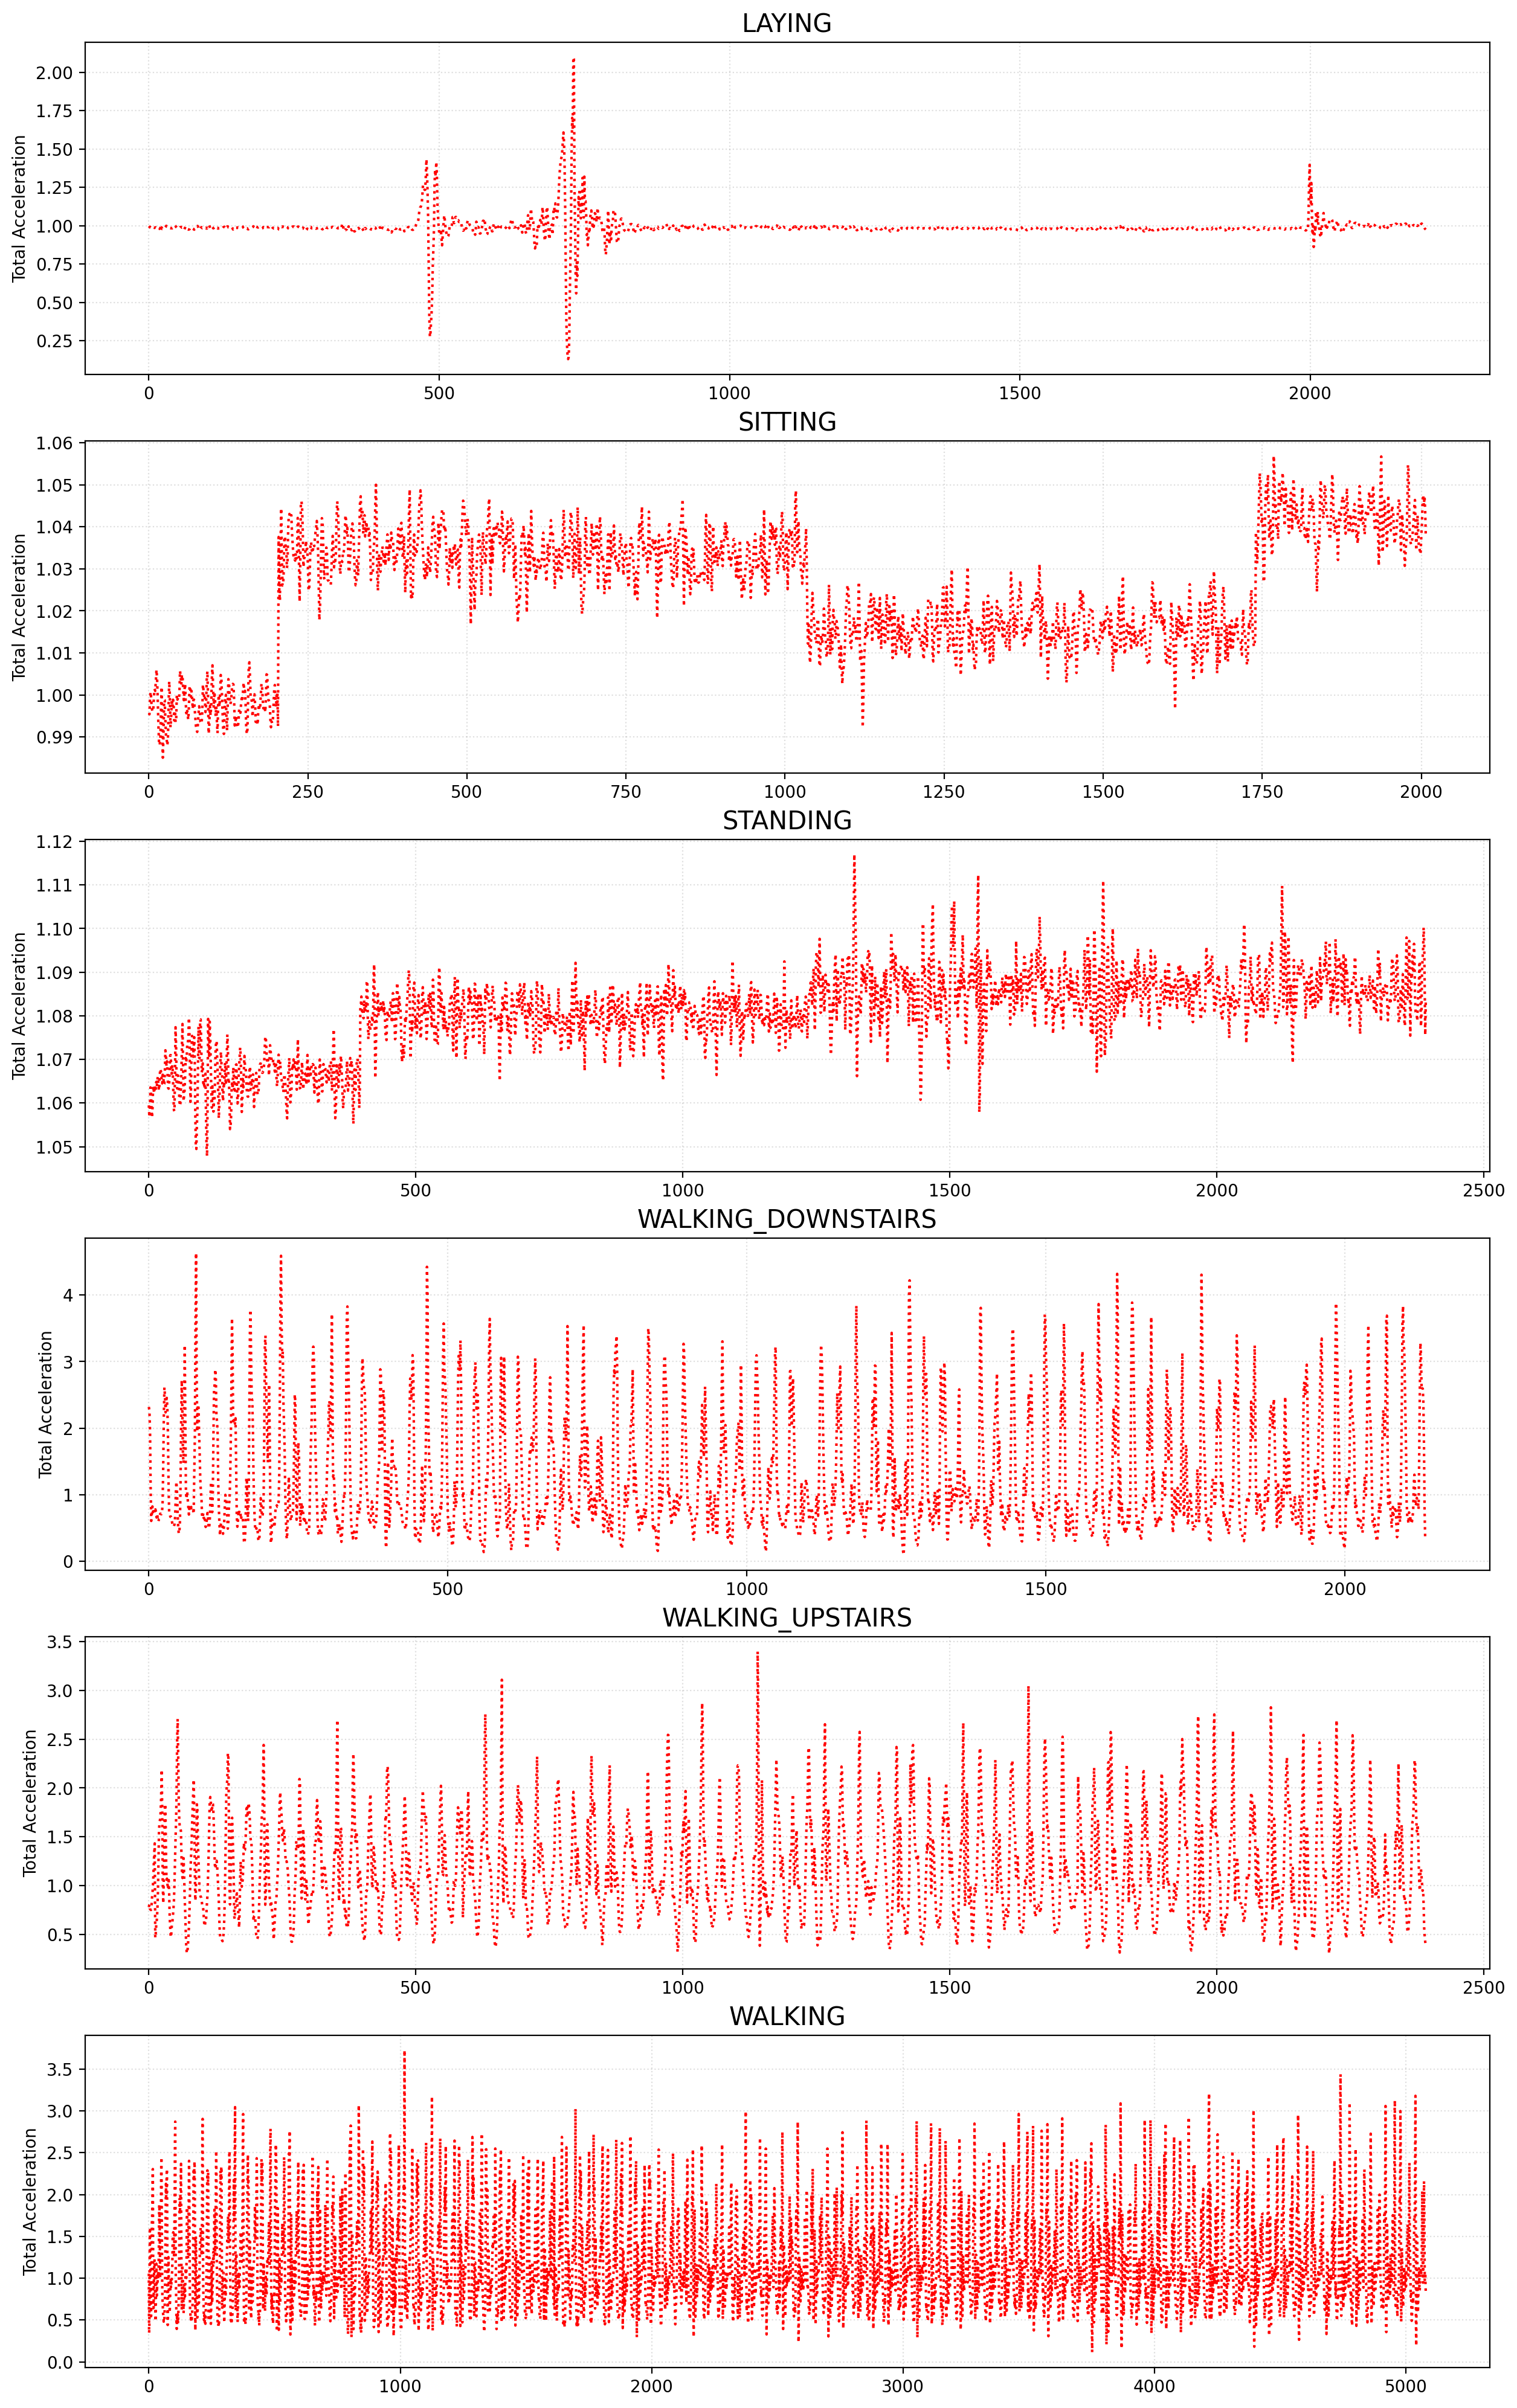

In [43]:
def calc_accn(file_path):
    df = pd.read_csv(file_path)
    
    # Calculate the total acceleration (Euclidean norm of accx, accy, accz)
    df['total_acceleration'] = (df['accx']**2 + df['accy']**2 + df['accz']**2)
    
    # Return the array of total acceleration values
    return df['total_acceleration'].values

def get_accn(folders):
    list_accelerations = []
    folder_names = []

    for folder in folders:
        file_path = os.path.join(folder, 'Subject_1.csv')
        accn_array = calc_accn(file_path)
        list_accelerations.append(accn_array)
        folder_names.append((folder)[17:-1])
        
    return list_accelerations, folder_names

def plot_accns(total_accelerations, folder_names):
    num_folders = len(total_accelerations)
    
    fig, axes = plt.subplots( num_folders,1, figsize=(15,25), squeeze=False)
    for i, (acceleration_array, folder_name) in enumerate(zip(total_accelerations, folder_names)):
        axes[i,0].plot(acceleration_array[500:-500],color='red', linestyle=':')
        axes[i,0].set_title(folder_name, fontsize=15, color='black')
        # axes[i,0].set_xlabel('index')
        axes[i,0].set_ylabel('Total Acceleration')
        axes[i,0].grid(True, linestyle=':', color='gray', alpha=0.25) 
    plt.show()

# Example usage
folders = [
    "./Combined/Train/LAYING/",
    "./Combined/Train/SITTING/",
    "./Combined/Train/STANDING/",
    "./Combined/Train/WALKING_DOWNSTAIRS/",
    "./Combined/Train/WALKING_UPSTAIRS/",
    "./Combined/Train/WALKING/"
]

ta, fn = get_accn(folders)
plot_accns(ta, fn)


# PCA

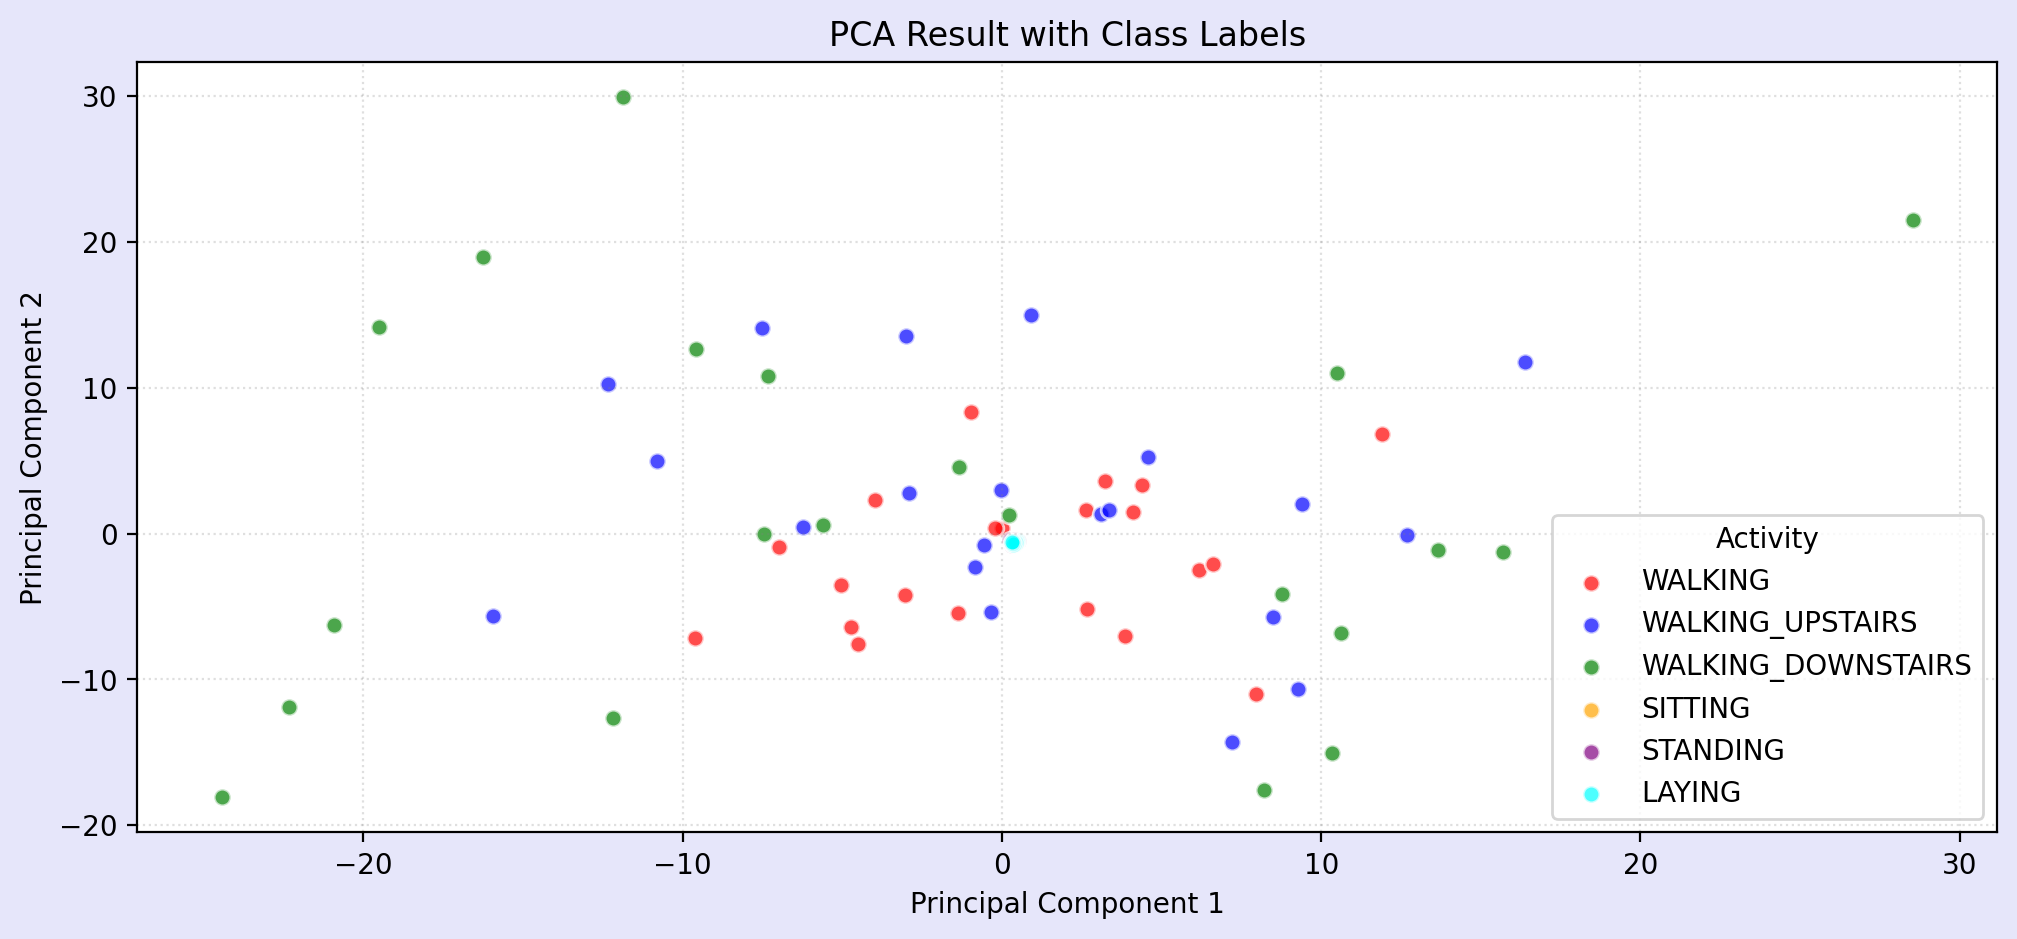

In [83]:
class_labels =  {1:"WALKING", 
                 2:"WALKING_UPSTAIRS",
                 3:"WALKING_DOWNSTAIRS",
                 4:"SITTING",
                 5:"STANDING",
                 6:"LAYING"}

X = mg_x_train  # Replace with your actual feature matrix
classes = y_train  # Replace with your actual class labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = classes

# Plot the PCA result with class labels
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
labels = list(class_labels.keys())  
plt.figure(figsize=(12, 5))
plt.gcf().patch.set_facecolor('lavender')

for i, class_label in enumerate(sorted(pca_df['Class'].unique())):
    class_data = pca_df[pca_df['Class'] == class_label]
    plt.scatter(class_data['PC1'], class_data['PC2'], 
                color=colors[i], 
                label=class_labels[class_label],  # Use class names
                alpha=0.7, 
                edgecolors='white')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with Class Labels')
plt.legend(title='Activity')
plt.grid(True, linestyle=':', color='gray', alpha=0.25)
plt.show()


In [29]:
dd = pd.DataFrame(mg_x_train)
dd['Activities']=y_train
dd

0         1         2         3         4         5         6  \
0    2.005249  2.160400  2.273817  2.109540  1.480720  1.188538  1.236224   
1    1.013713  1.020845  1.025296  1.027185  1.024007  1.022594  1.026870   
2    1.061579  1.068788  1.076640  1.081619  1.083677  1.089191  1.088519   
3    0.497171  0.558901  0.629017  0.762178  0.754270  0.740479  0.920398   
4    0.526393  0.612953  0.625144  0.617296  0.654806  0.651206  0.767416   
..        ...       ...       ...       ...       ...       ...       ...   
121  1.667010  1.683330  1.400401  1.398746  1.443760  1.429334  1.422312   
122  1.030068  1.028156  1.026852  1.031123  1.030664  1.027787  1.030023   
123  1.017618  1.015693  1.008254  1.003586  1.007235  1.019632  1.024020   
124  0.737070  0.742623  0.612213  0.611427  0.618866  0.576885  0.663982   
125  1.962789  2.081590  2.005729  1.920355  1.644706  1.351221  1.413024   

            7         8         9  ...       491       492       493  \
0    1.148906  1.224590  1.404729  ...  1.120623  1.052254  0.897080   
1    1.027072  1.027742  1.027175  ...  1.030065  1.015616  0.998280   
2    1.077718  1.072226  1.073787  ...  1.069200  1.072072  1.072758   
3    1.090739  1.126387  1.029941  ...  1.739091  2.384820  2.673074   
4    0.867818  0.892692  1.003664  ...  0.679142  0.652467  0.642199   
..        ...       ...       ...  ...       ...       ...       ...   
121  1.272041  1.266330  1.635466  ...  0.625043  0.718228  0.822178   
122  1.028752  1.024007  1.024407  ...  1.003453  1.005665  0.999863   
123  1.018601  1.018554  1.022413  ...  1.017458  1.010752  1.007533   
124  0.715187  0.761910  0.818487  ...  0.735479  0.709034  0.721843   
125  1.511544  1.541510  1.703515  ...  1.059246  1.144825  1.231154   

          494       495       496       497       498       499  Activities  
0    0.634980  0.462812  0.392290  0.366865  0.404079  0.471275           2  
1    1.006388  1.013092  1.003704  1.011527  1.021394  1.019440           6  
2    1.069753  1.067005  1.067372  1.070067  1.071565  1.065639           5  
3    2.355472  1.995429  1.663886  1.391880  1.428507  1.302203           2  
4    0.636815  0.576609  0.510688  0.563943  0.613582  0.627226           2  
..        ...       ...       ...       ...       ...       ...         ...  
121  0.822011  0.734799  0.777650  0.816605  0.869754  1.036154           1  
122  0.990790  0.992914  0.997406  0.995081  0.997205  1.003835           4  
123  1.003922  0.996629  1.002241  1.006147  1.008498  1.019451           6  
124  0.720080  0.607252  0.565186  0.529487  0.528832  0.512845           2  
125  1.070596  0.865544  0.698084  0.557224  0.536735  0.519804           2  

[126 rows x 501 columns]

In [ ]:
import numpy as np
import pandas as pd
import tsfel
import sys
import os

# Function to suppress stdout and stderr

# Generate synthetic time series data
np.random.seed(0)  # For reproducibility
num_samples = 126
num_timepoints = 500

# Simulate time series data
data = np.random.rand(num_samples, num_timepoints)  # Random values
dd = pd.DataFrame(data, columns=[f'timepoint_{i}' for i in range(num_timepoints)])

# Configure TSFEL to extract temporal features
cfg = tsfel.get_features_by_domain()  # Use temporal domain features

# Prepare an empty DataFrame to hold the extracted features
features_list = []

# Loop over each row in the DataFrame
for i in range(dd.shape[0]):
    # Extract features for the i-th row
     with suppress_stdout_stderr():
        X_tsfel = tsfel.time_series_features_extractor(cfg, np.array(dd.iloc[i]))

        # Flatten the result and append to the list
        features_list.append(X_tsfel.values.flatten())
     
# Convert the list of feature arrays into a DataFrame
tsfel_col = X_tsfel.columns
X_tsfel_df = pd.DataFrame(features_list,columns=tsfel_col)

# If more than 20 features are extracted, select the first 20 features

if X_tsfel_df.shape[1] > 20:
    X_tsfel_df = X_tsfel_df.iloc[:, :100]


In [30]:
print(f"Shape of the data {X_tsfel_df.shape}")
X_tsfel_df.head()

Shape of the data (126, 100)


0_Absolute energy  0_Area under the curve  0_Autocorrelation  \
0         165.780392                2.477715                1.0   
1         164.605463                2.471290                1.0   
2         176.244377                2.552788                1.0   
3         174.610443                2.551866                1.0   
4         166.612166                2.501642                1.0   

   0_Average power  0_Centroid  0_ECDF Percentile Count_0  \
0        33.222523    2.506346                      100.0   
1        32.987067    2.511162                      100.0   
2        35.319514    2.530072                      100.0   
3        34.992073    2.416321                      100.0   
4        33.389212    2.508556                      100.0   

   0_ECDF Percentile Count_1  0_ECDF Percentile_0  0_ECDF Percentile_1  \
0                      400.0             0.207470             0.799159   
1                      400.0             0.197259             0.811939   
2                      400.0             0.196451             0.817453   
3                      400.0             0.186130             0.821015   
4                      400.0             0.230774             0.793908   

   0_ECDF_0  ...  0_FFT mean coefficient_161  0_FFT mean coefficient_162  \
0     0.002  ...                    0.001783                    0.000122   
1     0.002  ...                    0.000980                    0.000146   
2     0.002  ...                    0.000600                    0.000648   
3     0.002  ...                    0.002856                    0.000981   
4     0.002  ...                    0.001927                    0.001823   

   0_FFT mean coefficient_163  0_FFT mean coefficient_164  \
0                    0.001092                    0.001915   
1                    0.000924                    0.000537   
2                    0.002929                    0.000935   
3                    0.000002                    0.002847   
4                    0.001153                    0.000506   

   0_FFT mean coefficient_165  0_FFT mean coefficient_166  \
0                    0.001527                    0.000179   
1                    0.000916                    0.002499   
2                    0.001940                    0.006278   
3                    0.000176                    0.004235   
4                    0.001954                    0.000207   

   0_FFT mean coefficient_167  0_FFT mean coefficient_168  \
0                    0.001869                    0.000613   
1                    0.000154                    0.002589   
2                    0.000521                    0.000936   
3                    0.003176                    0.002451   
4                    0.000225                    0.002121   

   0_FFT mean coefficient_169  0_FFT mean coefficient_17  
0                    0.002180                   0.002037  
1                    0.000948                   0.005556  
2                    0.001118                   0.003624  
3                    0.000226                   0.001084  
4                    0.000018                   0.001597  

[5 rows x 100 columns]

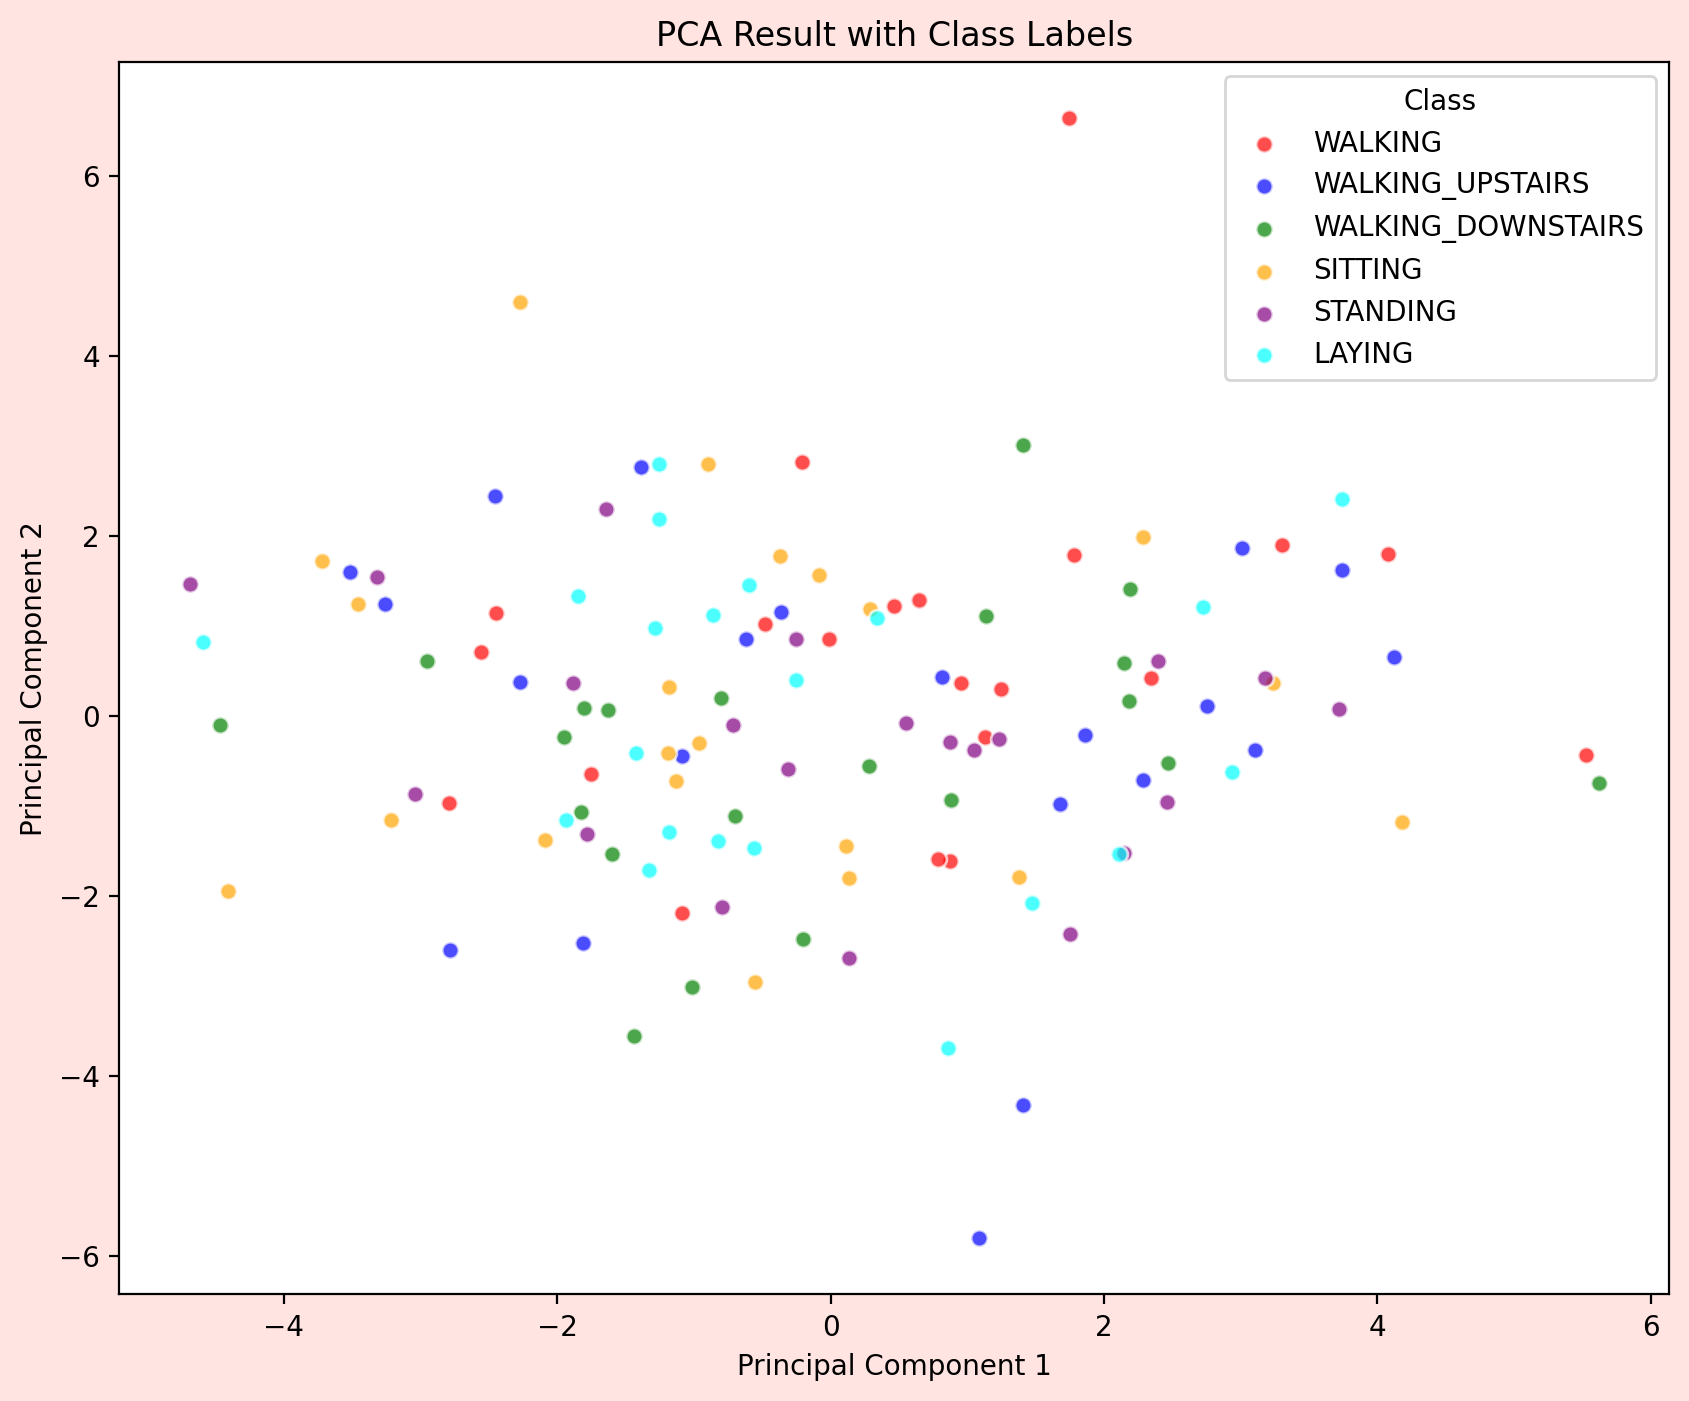

In [129]:
class_labels =  {1:"WALKING", 
                 2:"WALKING_UPSTAIRS",
                 3:"WALKING_DOWNSTAIRS",
                 4:"SITTING",
                 5:"STANDING",
                 6:"LAYING"}

# Example data
X = X_tsfel_df  # Replace with your actual feature matrix
classes = y_train  # Replace with your actual class labels

# Standardize the data
scaler = StandardScaler()
X_scaled_tsfel = scaler.fit_transform(X)

# Apply PCA
pca_tsfel = PCA(n_components=2)
X_pca_tsfel = pca.fit_transform(X_scaled_tsfel)

pca_df_tsfel = pd.DataFrame(X_pca_tsfel, columns=['PC1', 'PC2'])
pca_df_tsfel['Class'] = classes

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
labels = list(class_labels.keys())  # List of class names
plt.figure(figsize=(10, 8))
plt.gcf().patch.set_facecolor('mistyrose')
for i, class_label in enumerate(sorted(pca_df_tsfel['Class'].unique())):
    class_df_tsfel = pca_df_tsfel[pca_df_tsfel['Class'] == class_label]
    plt.scatter(class_df_tsfel['PC1'], class_df_tsfel['PC2'], color=colors[i], label=class_labels[class_label],alpha=0.7,edgecolors='w')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with Class Labels')
plt.legend(title='Class')
plt.show()

In [79]:
features = pd.read_csv("./UCI HAR Dataset/features.txt",delim_whitespace=True, header=None)
features.columns =["a","feature"]
features.drop("a",axis=1,inplace=True)
# features.drop_duplicates()
features.head(),features.shape
X_train_f = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
X_train_f.columns = features.values
X_train_f

(tBodyAcc-mean()-X,)  (tBodyAcc-mean()-Y,)  (tBodyAcc-mean()-Z,)  \
0                 0.288585             -0.020294             -0.132905   
1                 0.278419             -0.016411             -0.123520   
2                 0.279653             -0.019467             -0.113462   
3                 0.279174             -0.026201             -0.123283   
4                 0.276629             -0.016570             -0.115362   
...                    ...                   ...                   ...   
7347              0.299665             -0.057193             -0.181233   
7348              0.273853             -0.007749             -0.147468   
7349              0.273387             -0.017011             -0.045022   
7350              0.289654             -0.018843             -0.158281   
7351              0.351503             -0.012423             -0.203867   

      (tBodyAcc-std()-X,)  (tBodyAcc-std()-Y,)  (tBodyAcc-std()-Z,)  \
0               -0.995279            -0.983111            -0.913526   
1               -0.998245            -0.975300            -0.960322   
2               -0.995380            -0.967187            -0.978944   
3               -0.996091            -0.983403            -0.990675   
4               -0.998139            -0.980817            -0.990482   
...                   ...                  ...                  ...   
7347            -0.195387             0.039905             0.077078   
7348            -0.235309             0.004816             0.059280   
7349            -0.218218            -0.103822             0.274533   
7350            -0.219139            -0.111412             0.268893   
7351            -0.269270            -0.087212             0.177404   

      (tBodyAcc-mad()-X,)  (tBodyAcc-mad()-Y,)  (tBodyAcc-mad()-Z,)  \
0               -0.995112            -0.983185            -0.923527   
1               -0.998807            -0.974914            -0.957686   
2               -0.996520            -0.963668            -0.977469   
3               -0.997099            -0.982750            -0.989302   
4               -0.998321            -0.979672            -0.990441   
...                   ...                  ...                  ...   
7347            -0.282301             0.043616             0.060410   
7348            -0.322552            -0.029456             0.080585   
7349            -0.304515            -0.098913             0.332584   
7350            -0.310487            -0.068200             0.319473   
7351            -0.377404            -0.038678             0.229430   

      (tBodyAcc-max()-X,)  ...  (fBodyBodyGyroJerkMag-meanFreq(),)  \
0               -0.934724  ...                           -0.074323   
1               -0.943068  ...                            0.158075   
2               -0.938692  ...                            0.414503   
3               -0.938692  ...                            0.404573   
4               -0.942469  ...                            0.087753   
...                   ...  ...                                 ...   
7347             0.210795  ...                           -0.070157   
7348             0.117440  ...                            0.165259   
7349             0.043999  ...                            0.195034   
7350             0.101702  ...                            0.013865   
7351             0.269013  ...                           -0.058402   

      (fBodyBodyGyroJerkMag-skewness(),)  (fBodyBodyGyroJerkMag-kurtosis(),)  \
0                              -0.298676                           -0.710304   
1                              -0.595051                           -0.861499   
2                              -0.390748                           -0.760104   
3                              -0.117290                           -0.482845   
4                              -0.351471                           -0.699205   
...                                  ...                                 ...   
7347      

In [80]:
y_train_f = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
y_train_f.shape

(7352, 1)

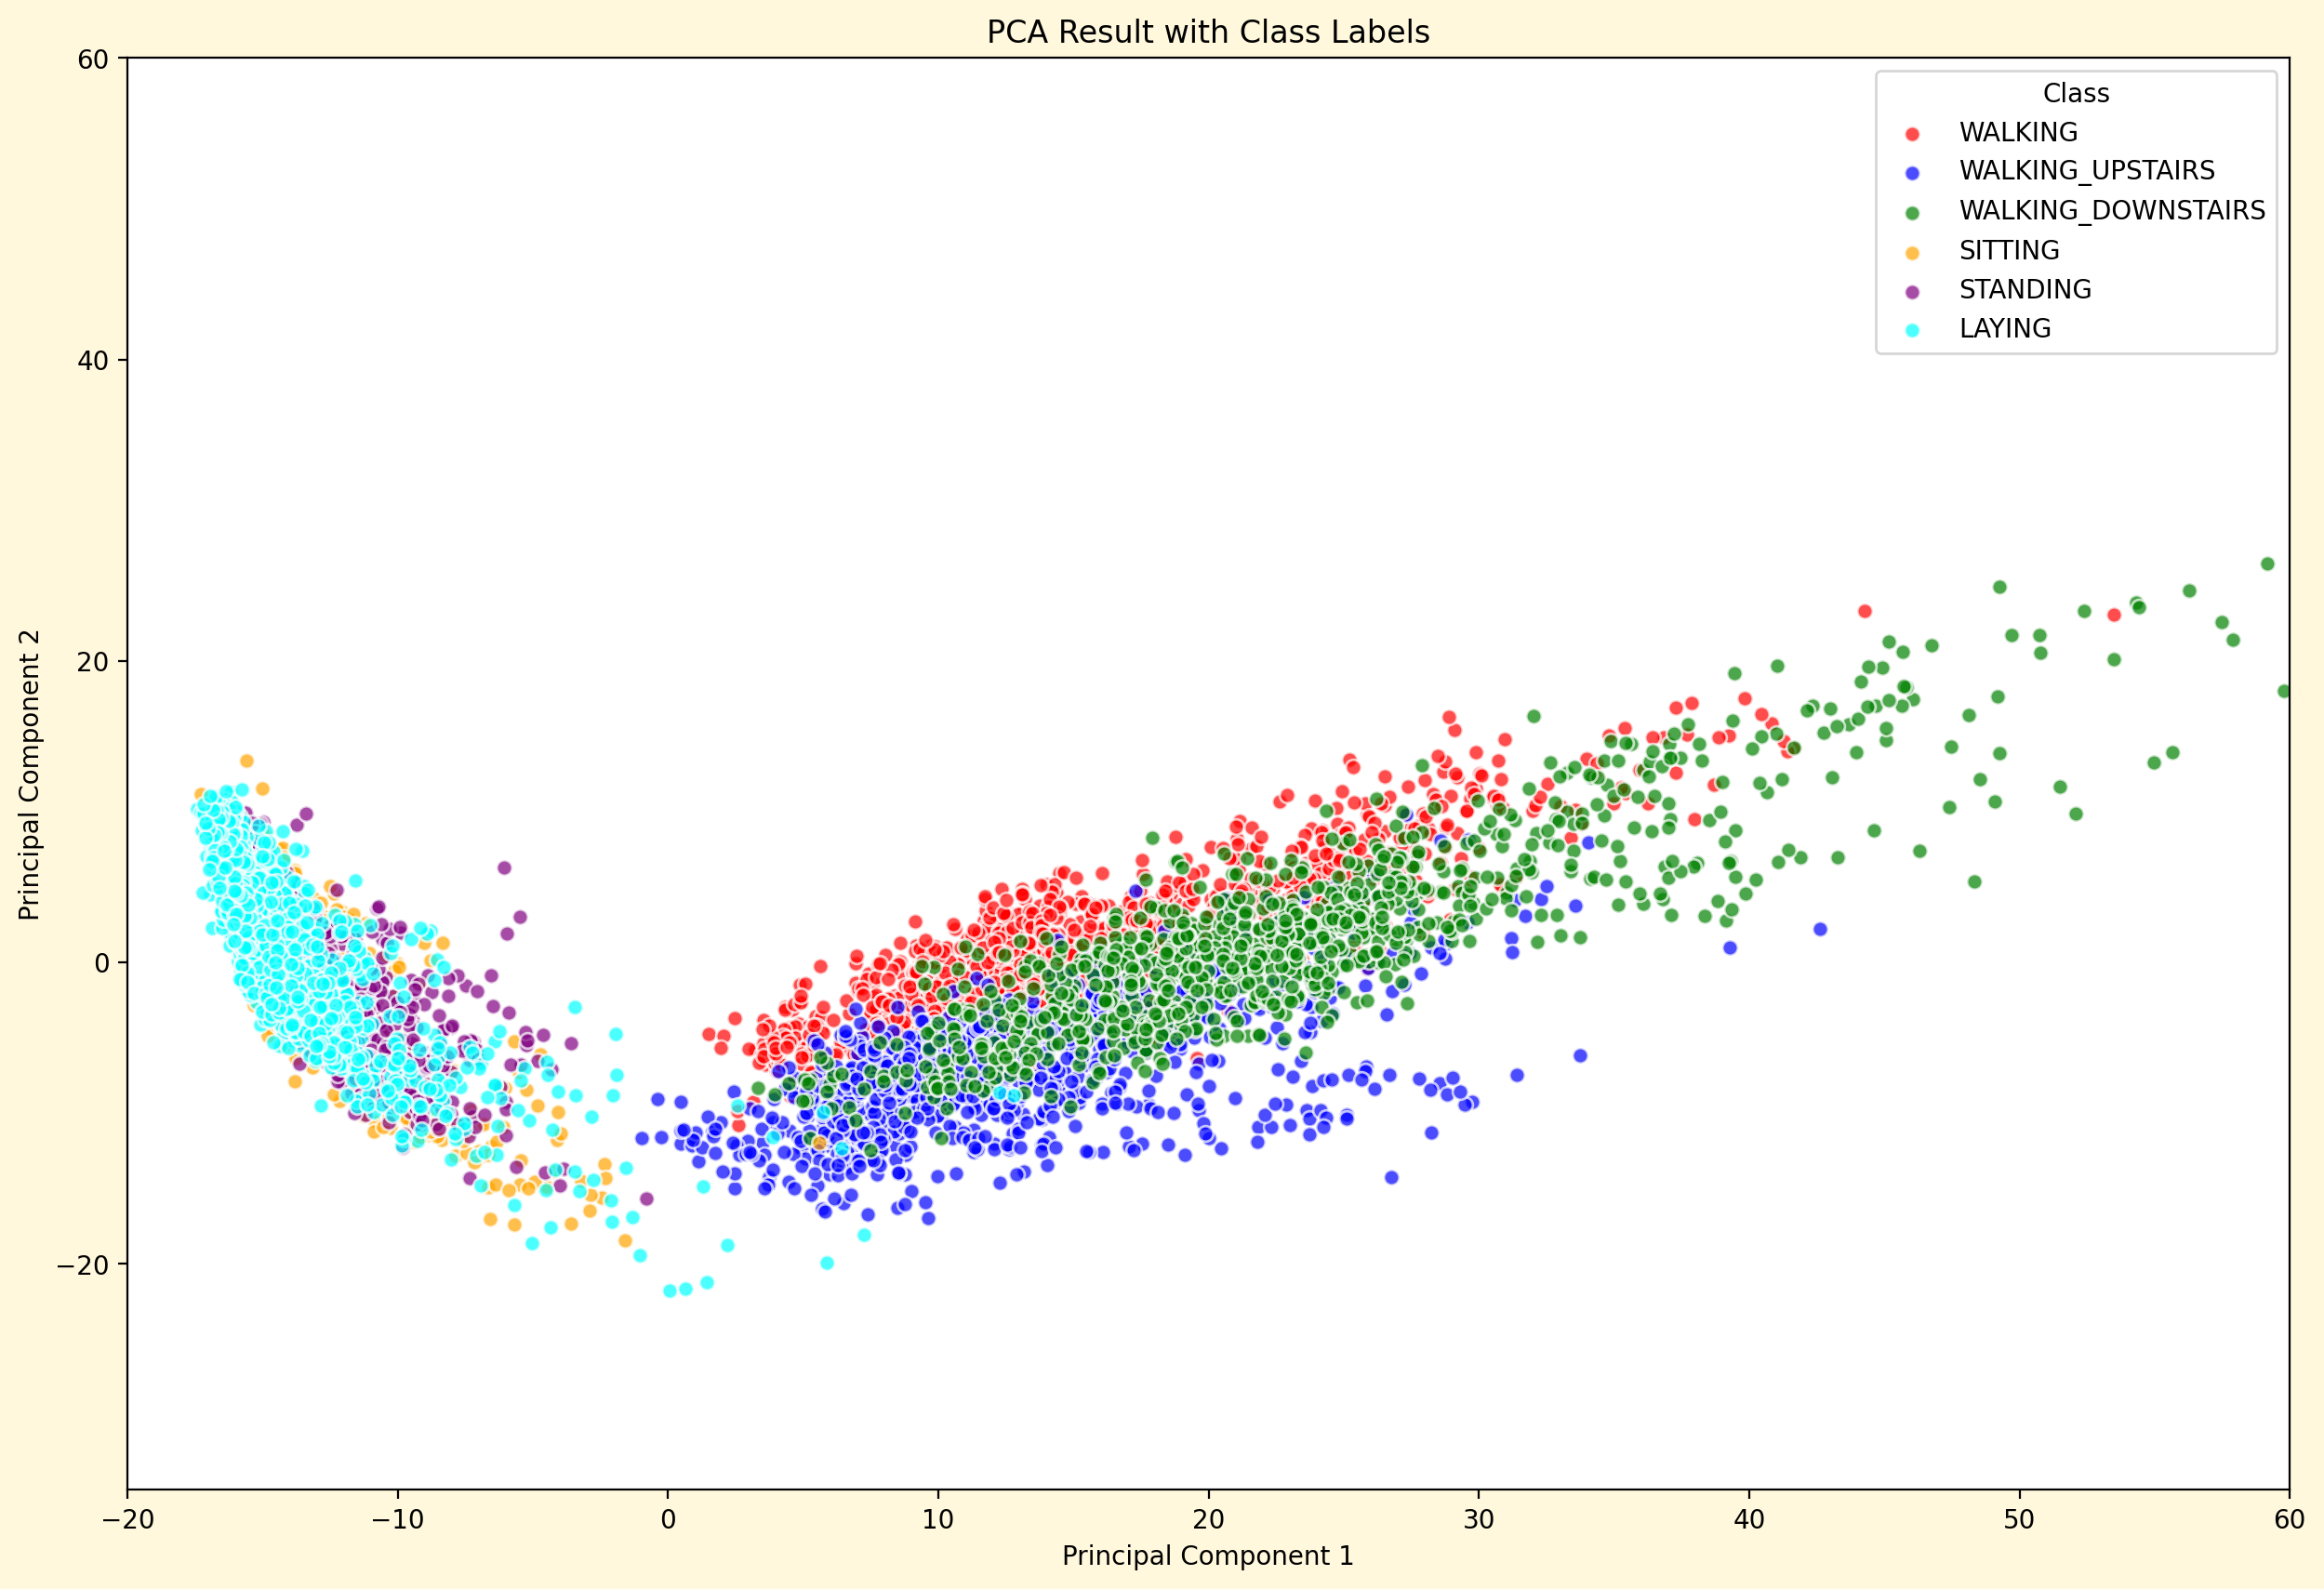

In [128]:
class_labels =  {1:"WALKING", 
                 2:"WALKING_UPSTAIRS",
                 3:"WALKING_DOWNSTAIRS",
                 4:"SITTING",
                 5:"STANDING",
                 6:"LAYING"}

# Example data
X = X_train_f  # Replace with your actual feature matrix
classes = y_train_f  # Replace with your actual class labels

# Standardize the data
scaler = StandardScaler()
X_scaled_f = scaler.fit_transform(X)

# Apply PCA
pca_f = PCA(n_components=2)
X_pca_f = pca.fit_transform(X_scaled_f)

pca_df_f = pd.DataFrame(X_pca_f, columns=['PC1', 'PC2'])
pca_df_f['Class'] = classes

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
labels = list(class_labels.keys())  # List of class names
plt.figure(figsize=(15, 10))
plt.gcf().patch.set_facecolor('cornsilk')
for i, class_label in enumerate(sorted(pca_df_f['Class'].unique())):
    class_df_f = pca_df_f[pca_df_f['Class'] == class_label]
    plt.scatter(class_df_f['PC1'], class_df_f['PC2'], color=colors[i], label=class_labels[class_label],alpha=0.7,edgecolors='w')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result with Class Labels')
plt.legend(title='Class')
plt.ylim(-35,60)
plt.xlim(-20,60)
plt.show()

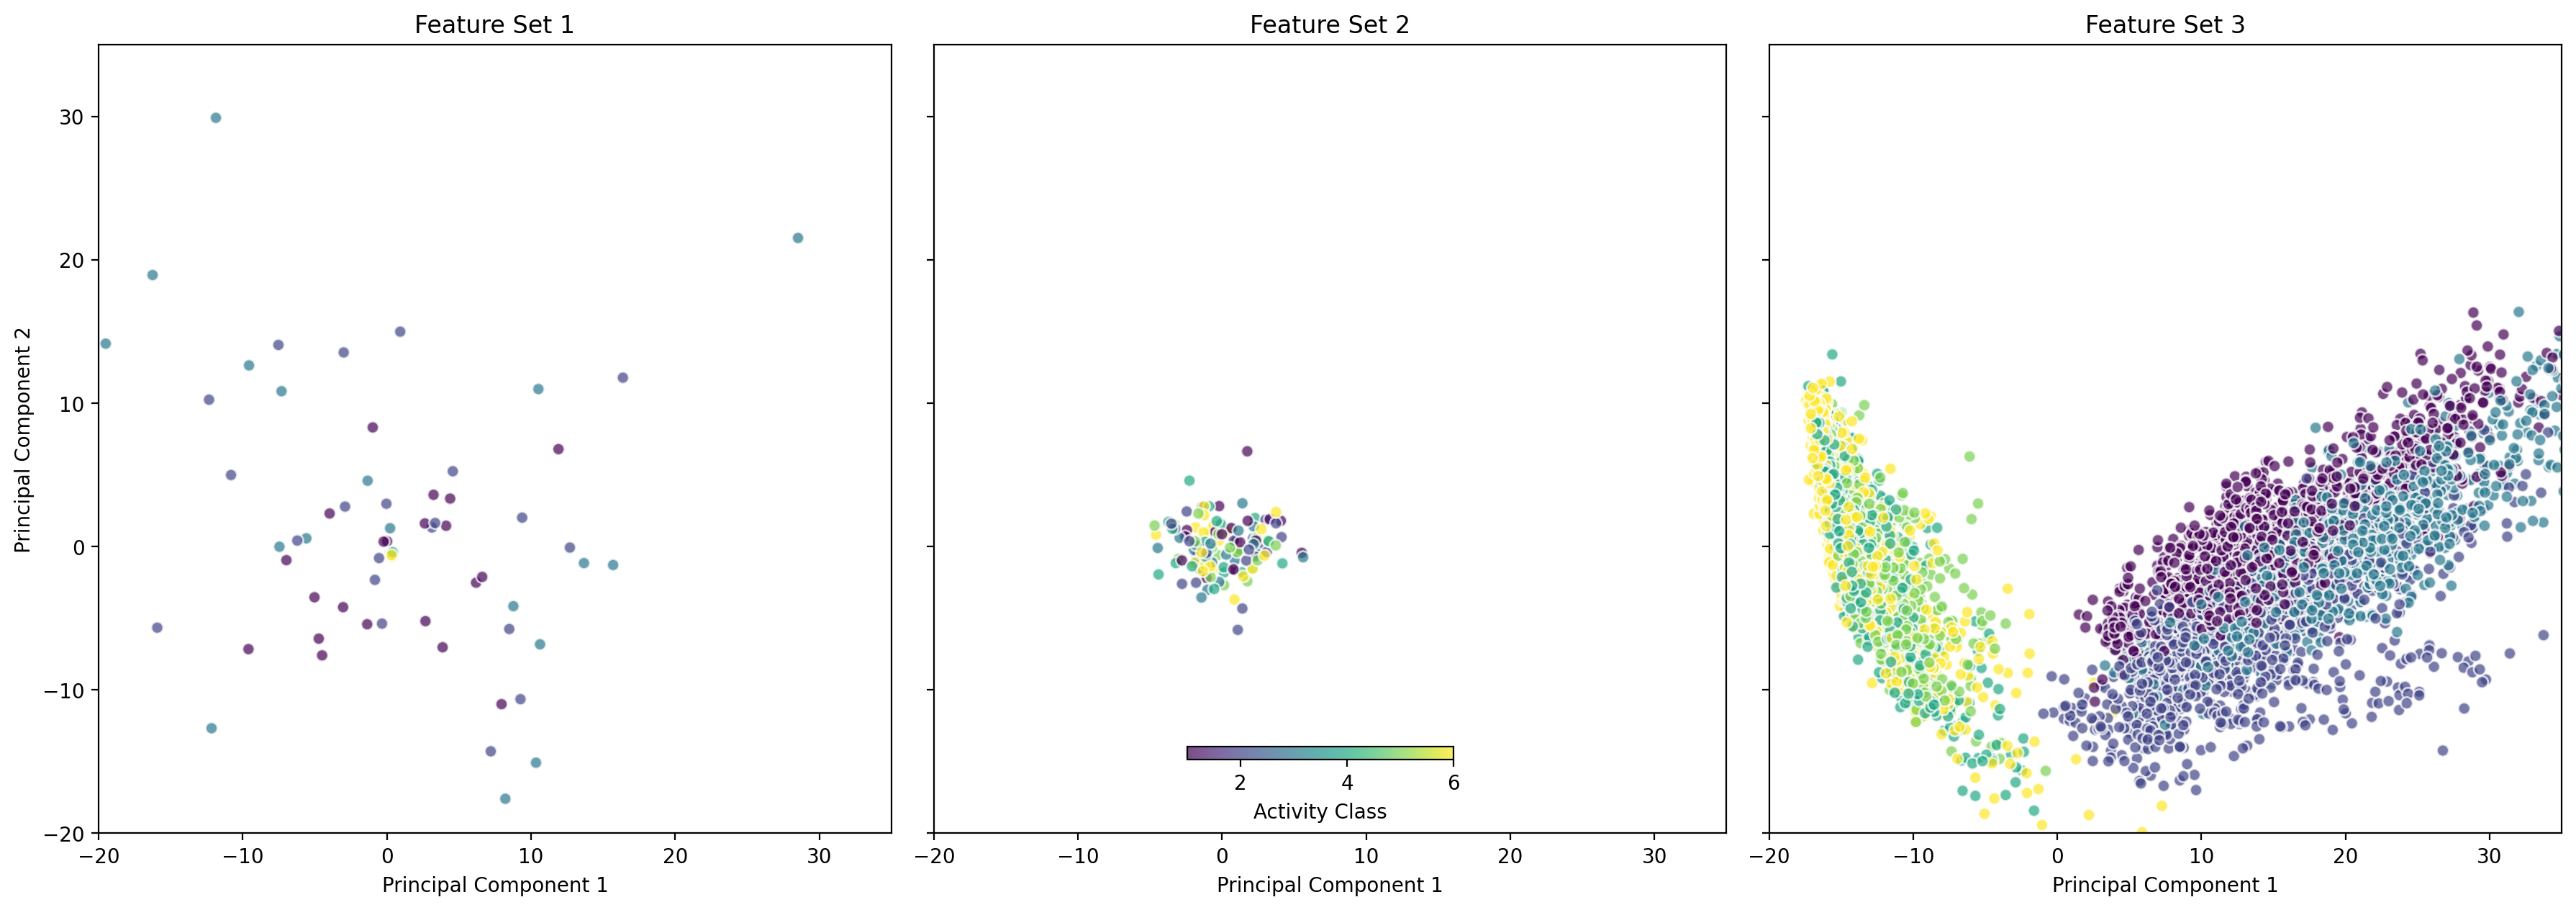

In [107]:
import matplotlib.pyplot as plt

# Example data setup
# Assume pca_df1, pca_df2, and pca_df3 are DataFrames with PCA results for the three feature sets.
# Each DataFrame should have 'PC1', 'PC2', and 'Class' columns.

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
axes[0].set_xlim(-20,35)
axes[0].set_ylim(-20,35)

# Plot for Feature Set 1
axes[0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Class'], cmap='viridis', alpha=0.7, edgecolors='w')
axes[0].set_title('Feature Set 1')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')


# Plot for Feature Set 2
axes[1].scatter(pca_df_tsfel['PC1'], pca_df_tsfel['PC2'], c=pca_df_tsfel['Class'], cmap='viridis', alpha=0.7, edgecolors='w')
axes[1].set_title('Feature Set 2')
axes[1].set_xlabel('Principal Component 1')


# Plot for Feature Set 3
axes[2].scatter(pca_df_f['PC1'], pca_df_f['PC2'], c=pca_df_f['Class'], cmap='viridis', alpha=0.7, edgecolors='w')
axes[2].set_title('Feature Set 3')
axes[2].set_xlabel('Principal Component 1')

# Add a common colorbar
cbar = plt.colorbar(axes[0].collections[0], ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label('Activity Class')

plt.tight_layout()

plt.show()


In [118]:
from sklearn.metrics import silhouette_score
pca_df1 = pca_df
pca_df2 = pca_df_tsfel
pca_df3 = pca_df_f
# Concatenate PCA results with labels
combined_df1 = pca_df1[['PC1', 'PC2']].values
combined_df2 = pca_df2[['PC1', 'PC2']].values
combined_df3 = pca_df3[['PC1', 'PC2']].values

# Compute silhouette scores
score1 = silhouette_score(combined_df1, pca_df1['Class'])
score2 = silhouette_score(combined_df2, pca_df2['Class'])
score3 = silhouette_score(combined_df3, pca_df3['Class'])

print(f'Silhouette Score for Feature Set 1: {score1}')
print(f'Silhouette Score for Feature Set 2: {score2}')
print(f'Silhouette Score for Feature Set 3: {score3}')



Silhouette Score for Feature Set 1: -0.14693331256057432
Silhouette Score for Feature Set 2: -0.10027671181776547
Silhouette Score for Feature Set 3: 0.013897111924689218



Feature Set 1:
Silhouette Score: -0.2540
Calinski-Harabasz Score: 1.1321
Variance Explained: PC1 0.5373, PC2 0.4627

Feature Set 2:
Silhouette Score: -0.1258
Calinski-Harabasz Score: 0.6890
Variance Explained: PC1 0.6047, PC2 0.3953

Feature Set 3:
Silhouette Score: -0.2541
Calinski-Harabasz Score: 0.7247
Variance Explained: PC1 0.9205, PC2 0.0795


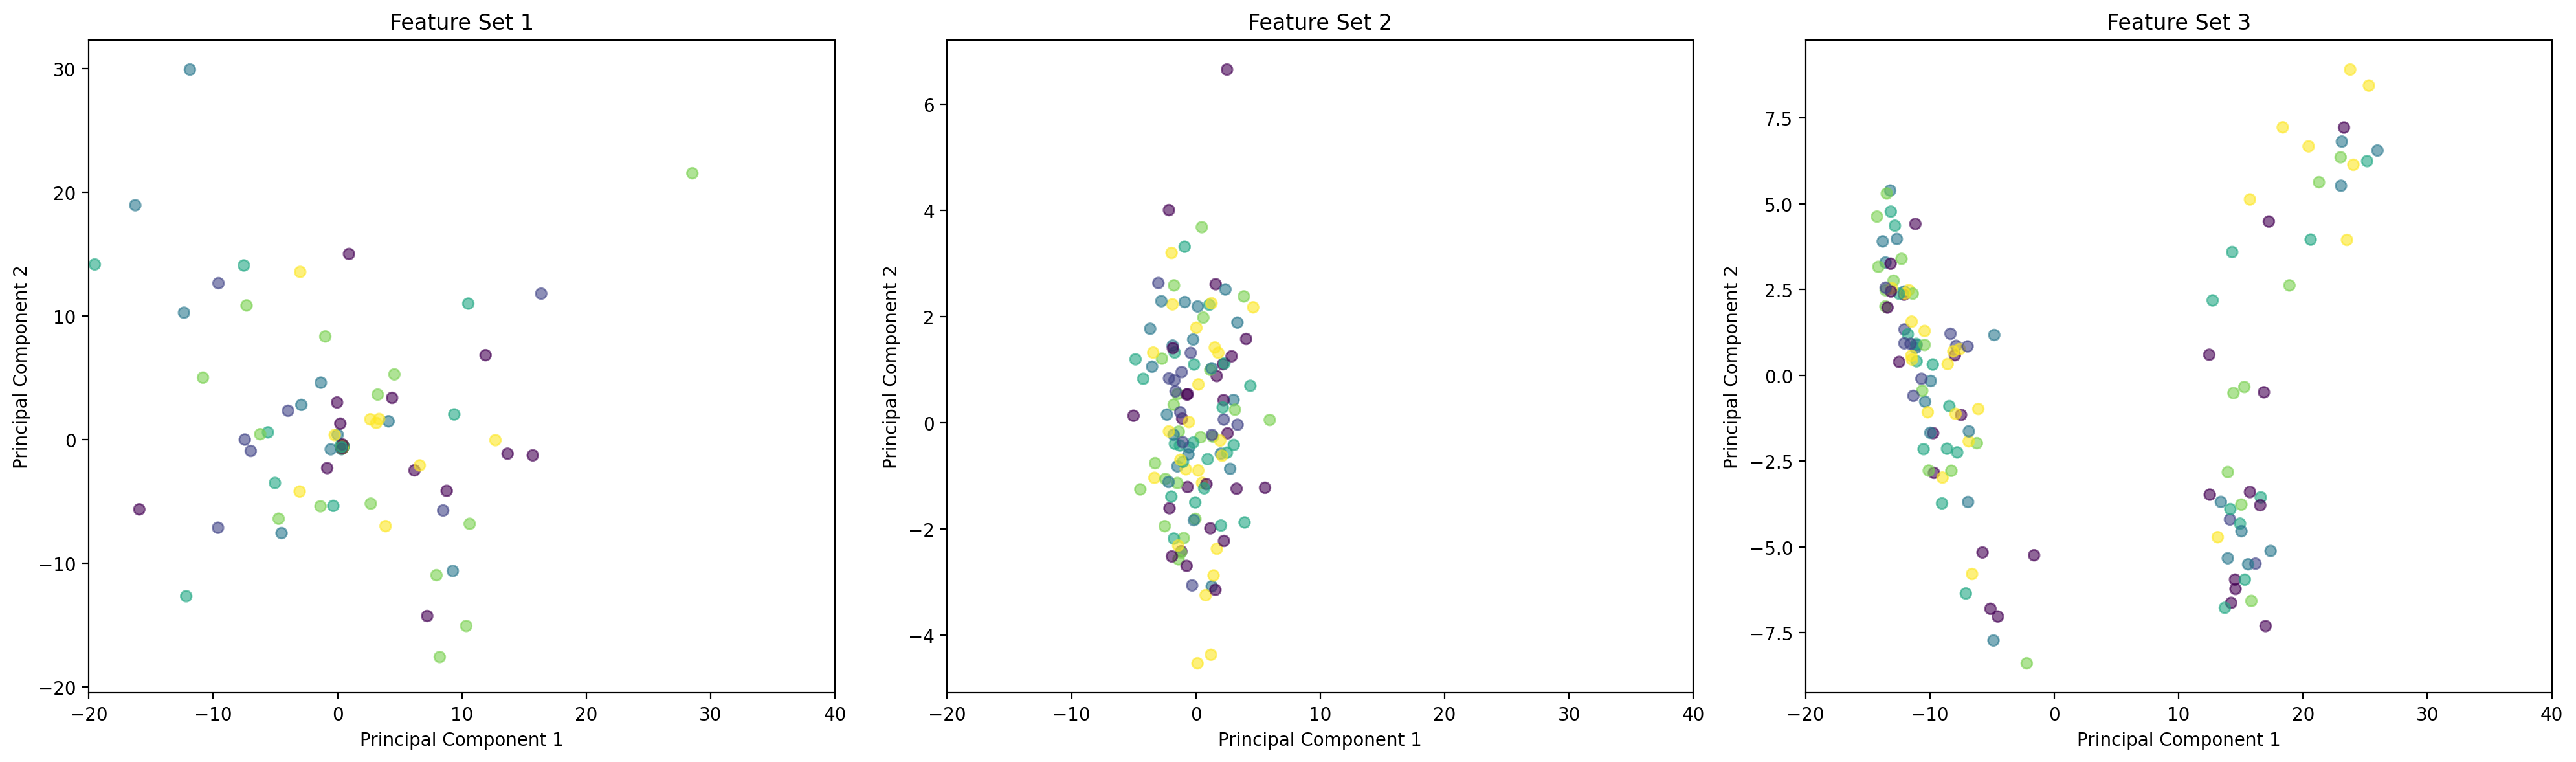

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.stats import f_oneway

def align_datasets(datasets, n_rows):
    """
    Align datasets to have the same number of rows by truncating or sampling.
    """
    aligned_datasets = []
    for data in datasets:
        if data.shape[0] > n_rows:
            # Truncate to n_rows
            aligned_data = data[16*n_rows:17*n_rows]
        elif data.shape[0] < n_rows:
            # Sample with replacement to n_rows
            indices = np.random.choice(data.shape[0], n_rows, replace=True)
            aligned_data = data[indices]
        else:
            aligned_data = data
        aligned_datasets.append(aligned_data)
    return aligned_datasets

# Example feature sets with different number of rows
feature_set1 = pca_df
feature_set2 = pca_df_tsfel  # Replace with actual data
feature_set3 = pca_df_f  # Replace with actual data

# Align datasets to have the same number of rows
n_common_rows = min(feature_set1.shape[0], feature_set2.shape[0], feature_set3.shape[0])
aligned_datasets = align_datasets([feature_set1, feature_set2, feature_set3], n_common_rows)

# Example labels (make sure they match the number of rows in the datasets)
labels = np.random.randint(1, 7, size=n_common_rows)  # Replace with your actual labels

# Apply PCA to each feature set
def fit_pca_and_transform(data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)
    return pca_result, pca

pca_data1, _ = fit_pca_and_transform(aligned_datasets[0])
pca_data2, _ = fit_pca_and_transform(aligned_datasets[1])
pca_data3, _ = fit_pca_and_transform(aligned_datasets[2])

# Define a function to compare feature sets
def compare_feature_sets(feature_sets, labels):
    for i, feature_set in enumerate(feature_sets, 1):
        print(f"\nFeature Set {i}:")
        try:
            # 1. Silhouette Score
            silhouette_avg = silhouette_score(feature_set, labels)
            print(f"Silhouette Score: {silhouette_avg:.4f}")
            
            # 2. Calinski-Harabasz Index
            ch_score = calinski_harabasz_score(feature_set, labels)
            print(f"Calinski-Harabasz Score: {ch_score:.4f}")
            
            # 3. Variance Explained
            pca_variance = np.var(feature_set, axis=0)
            total_variance = np.sum(pca_variance)
            variance_explained = pca_variance / total_variance
            print(f"Variance Explained: PC1 {variance_explained[0]:.4f}, PC2 {variance_explained[1]:.4f}")
            
            # 4. Class Separability (ANOVA)
            class_variances = [feature_set[labels == i] for i in np.unique(labels)]
            f_statistic, p_value = f_oneway(*class_variances)
            print(f"ANOVA F-statistic: {f_statistic:.4f}, p-value: {p_value:.4f}")
            
            # 5. Cluster Compactness
            class_variances = [np.var(feature_set[labels == i], axis=0) for i in np.unique(labels)]
            avg_variance = np.mean(class_variances)
            print(f"Average Cluster Variance: {avg_variance:.4f}")
        except:
            pass

# Combine PCA results into a list for comparison
pca_results = [pca_data1, pca_data2, pca_data3]

# Run comparison
compare_feature_sets(pca_results, labels)

# Visualize all three scatter plots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ['Feature Set 1', 'Feature Set 2', 'Feature Set 3']

for ax, data, title in zip(axes, pca_results, titles):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xlim(-20,40)

# Add a colorbar to the figure
# cbar = plt.colorbar(scatter, ax=axes, label='Activity Class')
plt.tight_layout()
plt.show()
